In [61]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plot_tools,syst_tools
from wremnants import histselections as sel
import hist
import narf
import numpy as np

In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
groups = datagroups2016("../mw_with_mu_eta_pt.pkl.lz4")


In [ ]:
groups.results["WplusmunuPostVFP"]["output"]["alphaS002NNPDF31"]

In [ ]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="muonScaleSyst_responseWeights", procsToRead=["Wmunu"])
histInfo = groups.getDatagroups()

In [ ]:
# This is for reading groups
groups.loadHistsForDatagroups("nominal", syst="", procsToRead=["Wmunu"])
groups.loadHistsForDatagroups("", syst="qcdScaleByHelicity", procsToRead=["Wmunu"])
histInfo = groups.getDatagroups()

In [ ]:
for i in range(9):
    sel.unrolledHist(procDict["Wmunu"]["qcdScaleByHelicity"][{"muRfact" : 2.j, "muFfact" : 2.j, "helicity" : i}]).plot(label=f"Coeff {i}")
plt.legend()
  

In [ ]:
hscaleUp = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 1, "scaleEtaSlice" : 1.j}]
hscaleDown = procDict["Wmunu"]["muonScaleSyst"][{"downUpVar" : 0, "scaleEtaSlice" : 1.j}]

In [ ]:
hnom = procDict["Wmunu"]["nominal"]
# Can also read specific samples by accessing the original 
hnomminus = groups.results["WminusmunuPostVFP"]["output"]["nominal"]

In [ ]:
hscaleUp.project("pt").plot()

In [ ]:
hh.divideHists(hscaleUp.project("pt"), hnom.project("pt")).plot()
hh.divideHists(hscaleDown.project("pt"), hnom.project("pt")).plot()
plt.ylim([0.995, 1.005])

In [ ]:
combine = datagroups2016("../temp/WMassCombineInput.root")

In [ ]:
procs = combine.datagroupsForHist("x_Wmunu_plus", label="nominal")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Up_plus", label="scaleEta0Up")
procs = combine.datagroupsForHist("x_Wmunu_CMS_scale_m_ieta0Down_plus", label="scaleEta0Down")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Up_plus", label="pdf1Up")
procs = combine.datagroupsForHist("x_Wmunu_pdf1NNPDF31Down_plus", label="pdf1Down")

In [ ]:
hh.divideHists(procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["nominal"]).plot()
hh.divideHists(procs["Wmunu"]["scaleEta0Down"], procs["Wmunu"]["nominal"]).plot()
#plt.ylim([0.99, 1.01])

In [ ]:
hmirror = hh.mirrorHist(hnom, procs["Wmunu"]["pdf1Up"])

In [ ]:
hh.divideHists(procs["Wmunu"]["pdf1Up"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
hh.divideHists(procs["Wmunu"]["pdf1Down"].project("pt"),procs["Wmunu"]["nominal"].project("pt")).plot()
plt.ylim([0.99, 1.01])

In [ ]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["scaleEta0Up"], procs["Wmunu"]["scaleEta0Down"]]]
#hists = [h.project("pt") for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "scaleEta0Up", "scaleEta0Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.998, 1.002])


In [ ]:
hists = [sel.unrolledHist(h) for h in [procs["Wmunu"]["nominal"], procs["Wmunu"]["pdf1Up"], procs["Wmunu"]["pdf1Down"]]]
colors = ["black", "red", "pink"]
labels = ["nominal", "pdf1Up", "pdf1Down"]

fig = plotTools.makePlotsWithRatioToRef(hists, labels, colors, xlabel=r"($\eta$, p$_{T}$) bin", scale=1e5,rrange=[0.995, 1.005])


In [7]:
histInfo = groups.getDatagroups()
groups.loadHistsForDatagroups("nominal", syst="", selectSignal=True, label="nominal", procsToRead=["Wmunu"])

In [55]:
groups.loadHistsForDatagroups("", syst="qcdScaleByHelicity", selectSignal=True, label="qcdScaleByHelicity", procsToRead=["Wmunu"], forceNonzero=False)

In [54]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=1.61805e+10, variance=1.49606e+10) (WeightedSum(value=1.84686e+10, variance=1.6827e+10) with flow)

In [10]:
histInfo["Wmunu"]["qcdScaleByHelicitySum"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"])

In [11]:
s = hist.tag.Slicer()
hVarNom = histInfo["Wmunu"]["qcdScaleByHelicity"][{"ptVgen" : s[::hist.sum], "chargeVgen" : s[::hist.sum], "helicity" : s[::hist.sum], "muRfact" : s[1.j], "muFfact" : s[1.j] }]


In [12]:
selections = [{"muRfact" : hist.loc(j), "muFfact" : hist.loc(j), "helicity" : i, "ptVgen" : 0, "chargeVgen" : -1j} for i in range(2) for j in [0.5,1.,2.]]
names = [f"muR{j}_muF{j}_hel_sigma{i}_ptVgen0_minus" for i in range(2) for j in [0.5,1.,2.]]

In [56]:
hists = [sel.unrolledHist(histInfo["Wmunu"]["nominal"])]
hists.extend([sel.unrolledHist(histInfo["Wmunu"]["qcdScaleByHelicitySum"][s]) for s in selections])
labels = ["nominal"]+names
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue"]

In [21]:
hists = [histInfo["Wmunu"]["nominal"].project("pt")]
hists.extend([histInfo["Wmunu"]["qcdScaleByHelicitySum"][s].project("pt") for s in selections])

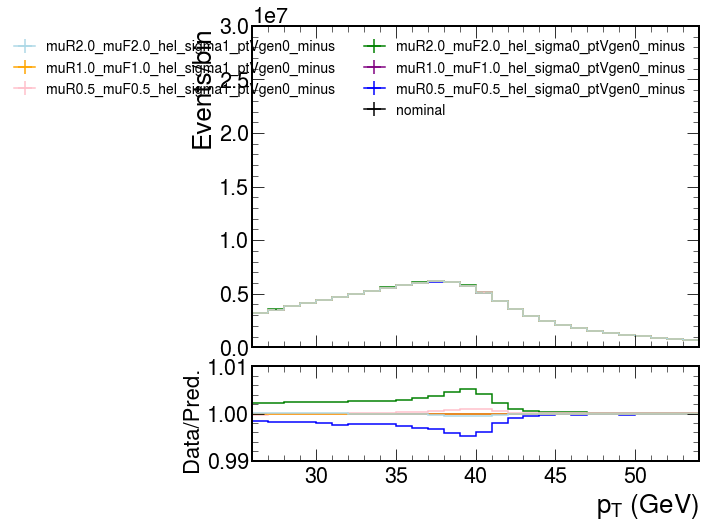

In [23]:
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", ymax=3e7,rrange=[0.99, 1.01])

10 10 10


(-100000.0, 8000000.0)

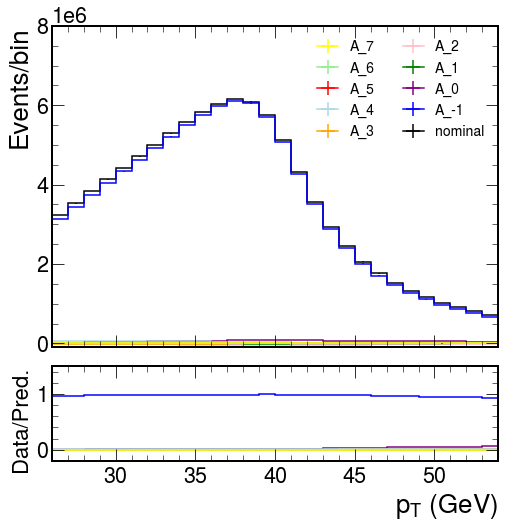

In [80]:
selections = [{"muRfact" : 1.j, "muFfact" : 1.j, "helicity" : i} for i in range(9)]
#histInfo["Wmunu"]["qcdScaleByHelicity"] = syst_tools.scale_helicity_hist_to_variations(histInfo["Wmunu"]["qcdScaleByHelicity"], sum_ptV=True)
hists = [histInfo["Wmunu"]["nominal"].project("pt")]
hists.extend([histInfo["Wmunu"]["qcdScaleByHelicity"][s].project("pt") for s in selections])
labels = ["nominal"]+[f"A_{i-1}" for i in range(9)]
colors = ["black", "blue", "purple", "green", "pink", "orange", "lightblue", "red", "lightgreen", "yellow"]
print(len(hists), len(labels), len(colors))
fig = plot_tools.makePlotWithRatioToRef(hists, labels, colors, xlabel=r"p$_{T}$ (GeV)", ymax=8e6,rrange=[-0.2, 1.5])
fig.get_axes()[0].set_ylim([-1e5, 8e6])

In [72]:
hists[1]

Hist(Regular(29, 26, 55, name='pt', label='pt'), storage=Weight()) # Sum: WeightedSum(value=9.81224e+07, variance=7.85507e+07) (WeightedSum(value=1.11138e+08, variance=8.80264e+07) with flow)

In [52]:
histInfo["Wmunu"]["qcdScaleByHelicity"][selections[1]].project("pt")

Hist(Regular(29, 26, 55, name='pt', label='pt'), storage=Weight()) # Sum: WeightedSum(value=1.99814e+08, variance=1.63275e+08) (WeightedSum(value=2.28056e+08, variance=1.84088e+08) with flow)

In [53]:
histInfo["Wmunu"]["qcdScaleByHelicity"]

Hist(
  Regular(48, -2.4, 2.4, name='eta', label='eta'),
  Regular(29, 26, 55, name='pt', label='pt'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='charge', label='charge'),
  Regular(2, -2, 2, underflow=False, overflow=False, name='chargeVgen', label='chargeVgen'),
  Integer(-1, 8, underflow=False, overflow=False, name='helicity', label='helicity'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muRfact', label='muRfact'),
  Variable([0.25, 0.75, 1.25, 2.75], underflow=False, overflow=False, name='muFfact', label='muFfact'),
  storage=Weight()) # Sum: WeightedSum(value=1.61805e+10, variance=1.49606e+10) (WeightedSum(value=1.84686e+10, variance=1.6827e+10) with flow)

In [ ]:
histInfo["Wmunu"]["nominal"].project("pt").plot()
histInfo["Wmunu"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()

In [ ]:
print(groups.results["WminusmunuPostVFP"]["output"]["nominal"].sum(flow=True))
print(groups.results["WminusmunuPostVFP"]["output"]["qcdScale"][{"muRfact" : 1.j, "muFfact" : 1.j}].sum(flow=True))


In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WplusmunuPostVFP"]["output"]["nominal"].project("pt").plot(label="nominal")
groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"][{"muRfact" : 1.j, "muFfact" : 1.j}].project("pt").plot()
plt.legend()

In [ ]:
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
#groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"]
groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
orig = groups.results["WplusmunuPostVFP"]["output"]["qcdScaleByHelicity"].copy()
orig

In [ ]:
orig_sum = orig +  groups.results["WminusmunuPostVFP"]["output"]["qcdScaleByHelicity"]

In [ ]:
orig_sum.sum(flow=True)

In [ ]:
histInfo["Wmunu"]["qcdScaleByHelicity"]